### Preliminaries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_pickle("saved_df.pkl")

### Explore Data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(707, 9)

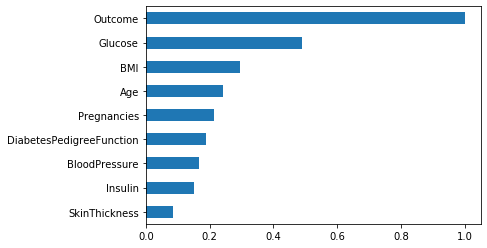

In [5]:
df.corr()["Outcome"].sort_values().plot.barh()  #Outcome ile corr'ları bar chart ile cizdirdik.

In [6]:
#Create the features matrix and Create the target vector
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
#Split Into Training And Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

**Logistic Regression**

In [7]:
#Create the Logistic Model
log_model=LogisticRegression()
#Fit the Model
log_model.fit(X_train,y_train)
#Predict the test set
y_pred=log_model.predict(X_test)
#Evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[122  24]
 [ 31  36]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



**K_Nearest Neighbor**

In [8]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
74,1,79,75,30,0,32.0,0.396,22
13,1,189,60,23,846,30.1,0.398,59
401,6,137,61,0,0,24.2,0.151,55
634,10,92,62,0,0,25.9,0.167,31
197,3,107,62,13,48,22.9,0.678,23


In [9]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,3.696356,121.362348,72.536437,21.216599,83.748988,32.447571,0.474142,33.172065
std,3.087124,29.868887,11.833432,15.186990,116.644576,6.743599,0.339204,11.731303
min,0.000000,56.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.800000,0.240250,24.000000
50%,3.000000,116.000000,72.000000,24.000000,46.500000,32.150000,0.372500,29.000000
75%,6.000000,140.000000,80.000000,33.000000,130.000000,36.750000,0.635500,41.000000
max,12.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,67.000000


In [10]:
#Standardize Features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
a = pd.DataFrame(X_train, columns = X.columns)

In [12]:
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.874306,-1.419714,0.208398,0.578937,-0.718712,-0.066437,-0.230602,-0.953295
1,-0.874306,2.266781,-1.060482,0.117549,6.541442,-0.348471,-0.224700,2.203857
2,0.746967,0.524074,-0.975890,-1.398441,-0.718712,-1.224262,-0.953614,1.862543
3,2.043985,-0.984038,-0.891298,-1.398441,-0.718712,-0.971915,-0.906397,-0.185339
4,-0.225797,-0.481334,-0.891298,-0.541577,-0.306789,-1.417233,0.601600,-0.867966


In [13]:
##Create and fit the Model
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [14]:
#Predict the test set
y_pred = knn_model.predict(X_test)
#Evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[122  24]
 [ 31  36]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



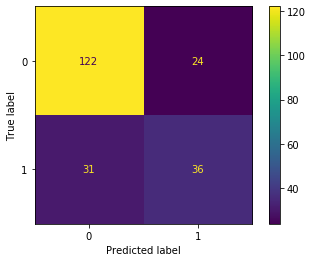

In [15]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,y_test,values_format='d');

**Model Tunning**

In [16]:
knn = KNeighborsClassifier()

In [17]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [18]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [19]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [20]:
knn_cv_model.best_params_

{'n_neighbors': 13}

**Fitting model with best parameter**

In [21]:
knn_tuned = KNeighborsClassifier(n_neighbors = 13).fit(X_train, y_train)

In [22]:
##Predict the test set
y_pred = knn_tuned.predict(X_test)
##Evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[129  17]
 [ 35  32]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.65      0.48      0.55        67

    accuracy                           0.76       213
   macro avg       0.72      0.68      0.69       213
weighted avg       0.74      0.76      0.74       213



**GridSearch with Recall**

In [23]:
knn_cv_model = GridSearchCV(knn, knn_params, scoring = "recall", cv = 10).fit(X_train, y_train)

In [24]:
knn_cv_model.best_params_

{'n_neighbors': 1}

In [25]:
knn_tuned = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[110  36]
 [ 28  39]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       146
           1       0.52      0.58      0.55        67

    accuracy                           0.70       213
   macro avg       0.66      0.67      0.66       213
weighted avg       0.71      0.70      0.70       213

